In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")

In [4]:
df = df.drop('User ID', axis = 1)
df = df.drop('Gender', axis = 1)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Purchased", axis = 1), df["Purchased"], test_size = 0.3, random_state = 0)
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [22]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [8]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [9]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


<Axes: title={'center': 'After_Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

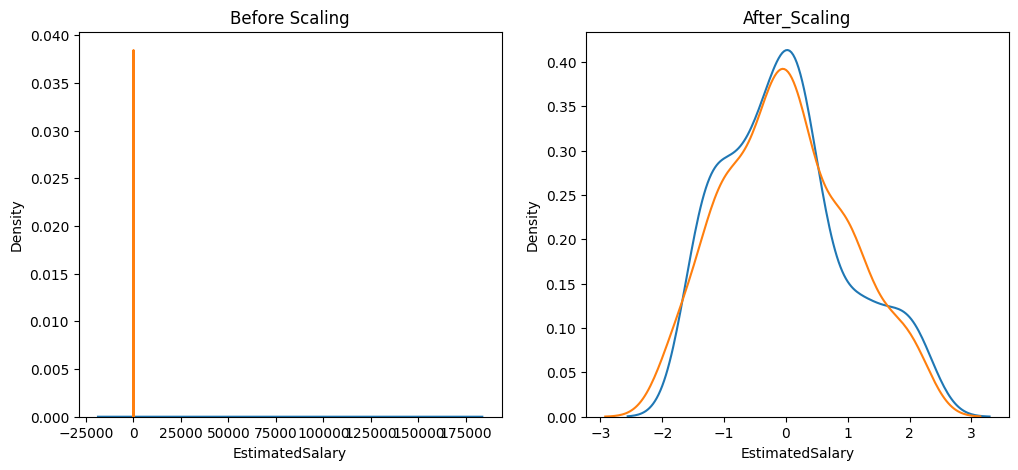

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)
sns.kdeplot(X_train['Age'], ax = ax1)

ax2.set_title("After_Scaling")
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax = ax2)
sns.kdeplot(X_train_scaled["Age"], ax = ax2)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [15]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [17]:
y_pred = lr.predict(X_test)
y_scaled_pred = lr_scaled.predict(X_test_scaled)

In [19]:
from sklearn.metrics import accuracy_score

In [23]:
print("Actual", accuracy_score(y_pred, y_test))
print("Scaled", accuracy_score(y_scaled_pred, y_test))

Actual 0.875
Scaled 0.8666666666666667
